# Unsupervised Learning

## 계층적 군집분석(Hierarchical Clustering)

- data scaling
- linkage()로 distance matrix 산출
- dendrogram을 통해서 어떤 것들이 유사한지 확인
- 군집결정:fcluster()
- 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 정규화
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(df)
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
# distance matrix
from scipy.cluster.hierarchy import linkage, fcluster

In [7]:
distance_matrix = linkage(scaled_data, method="ward", metric="euclidean")
distance_matrix

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.53000000e+02, 1.72216546e

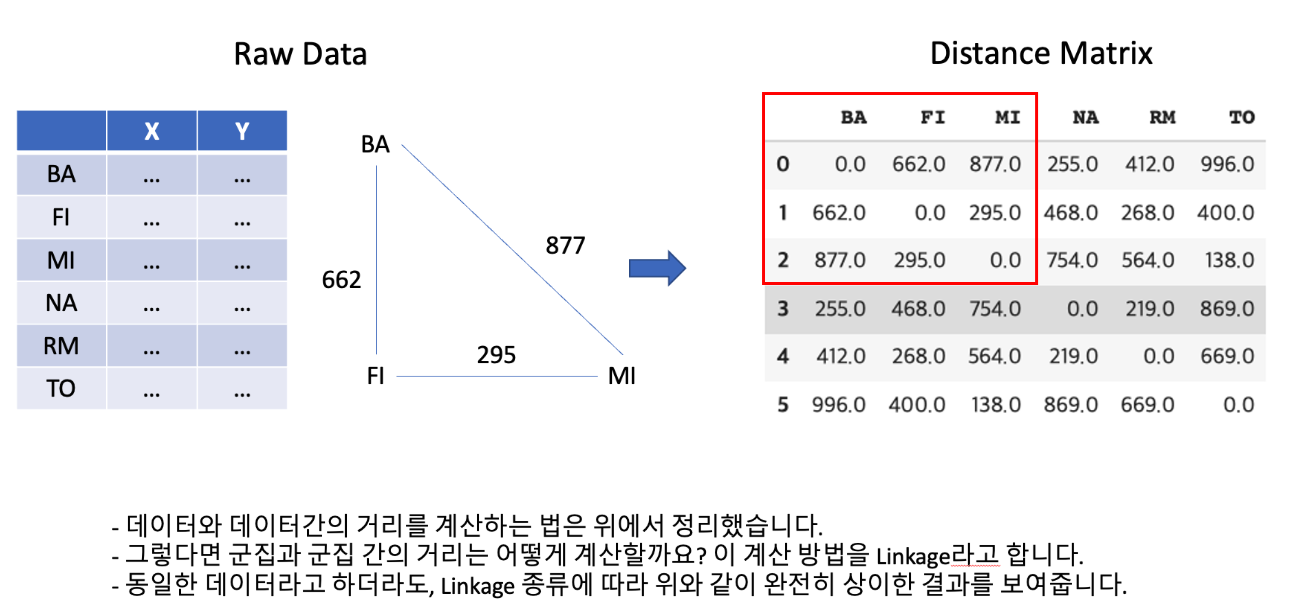

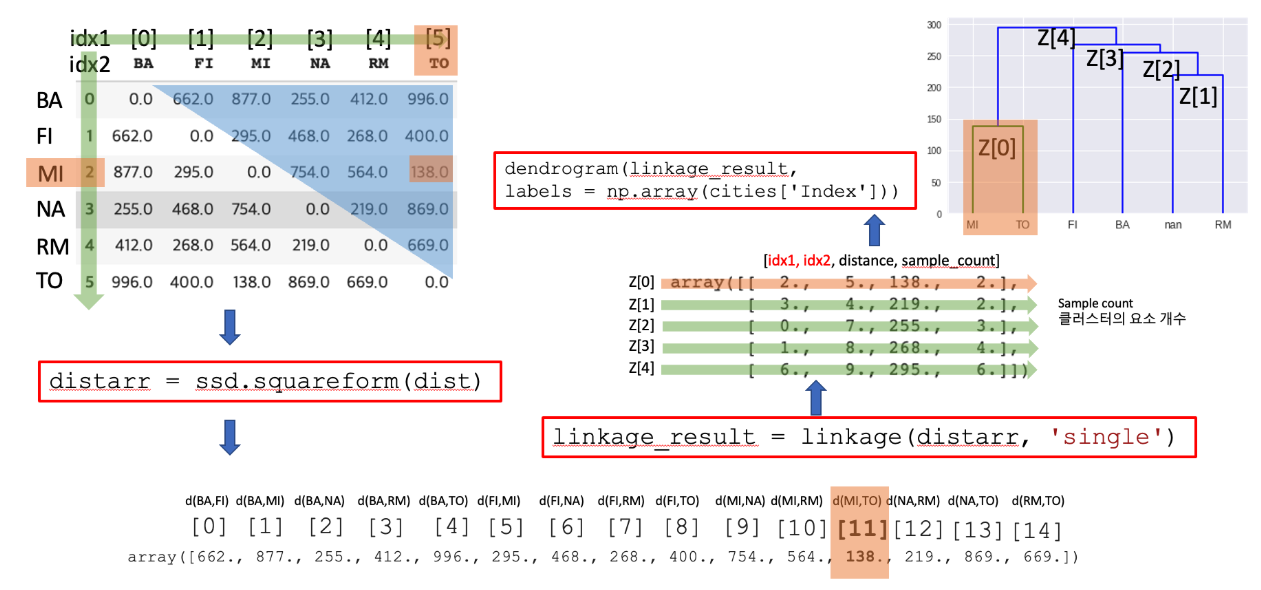

- 덴드로그램 그리기

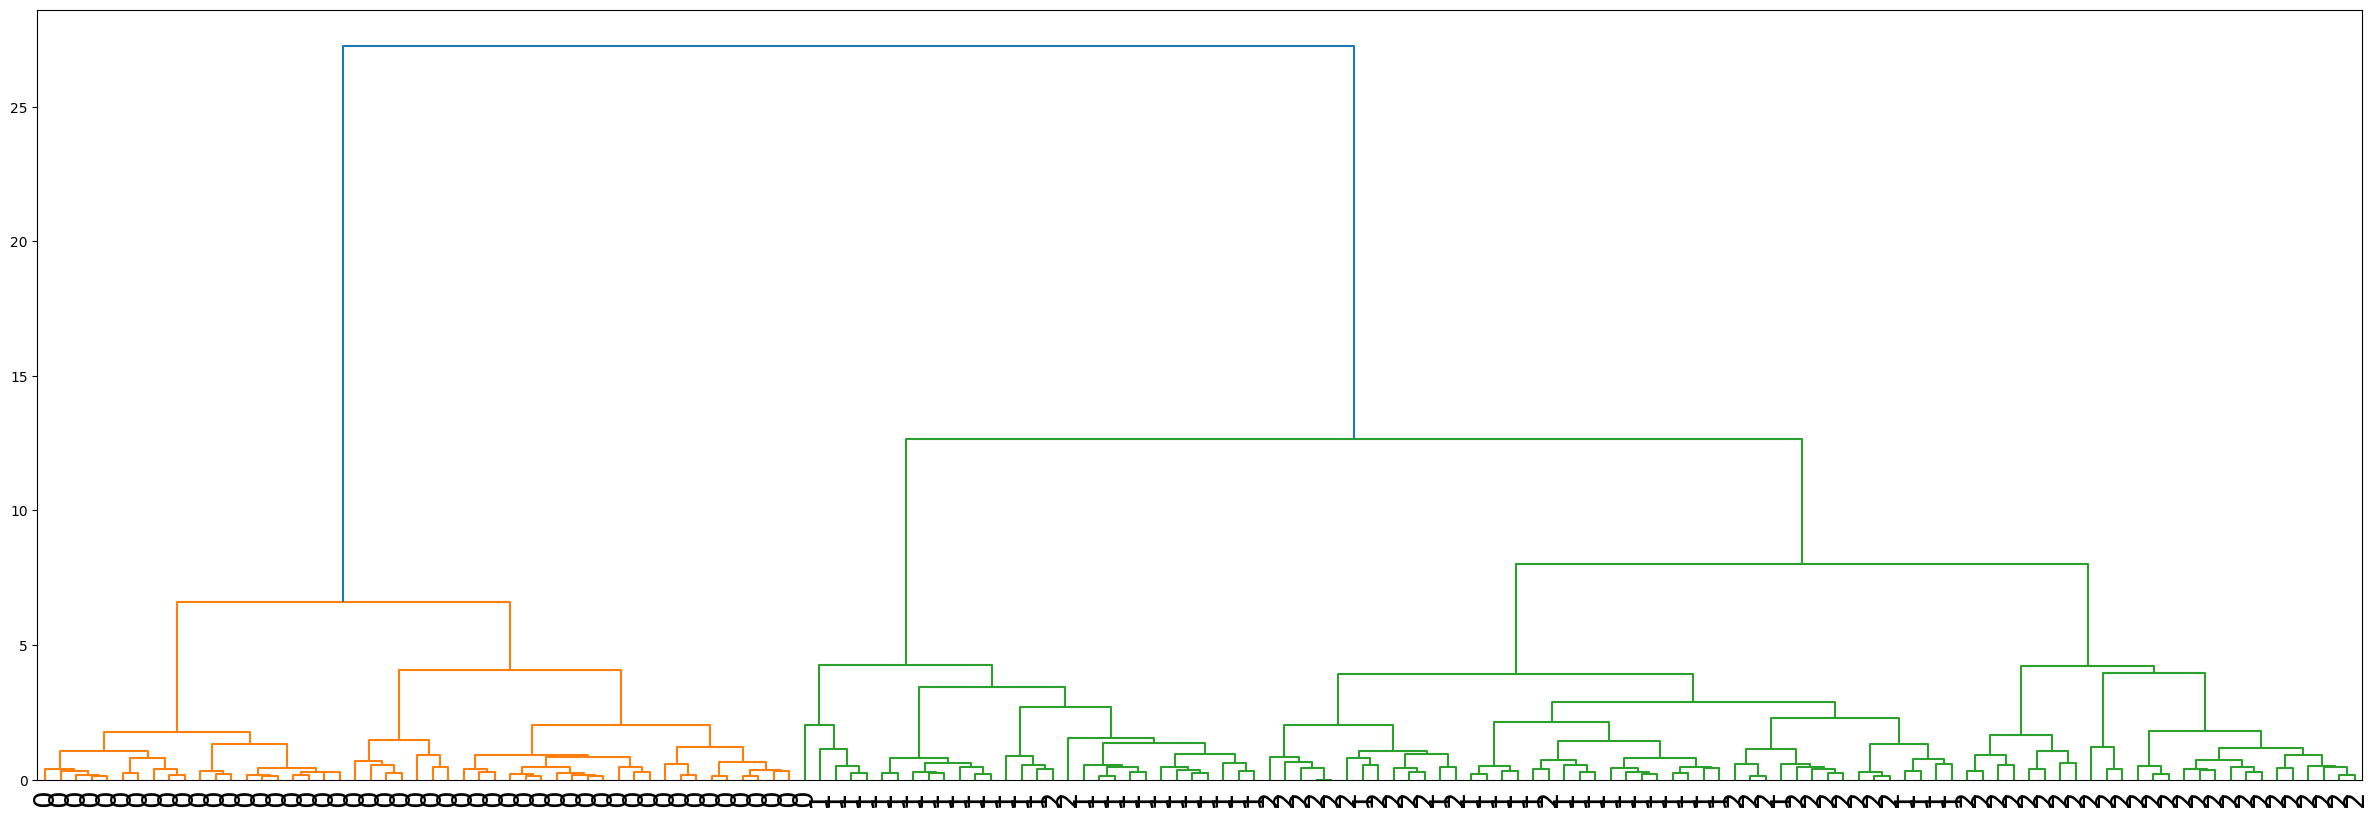

In [8]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))

dn = dendrogram(distance_matrix, labels=iris["target"], leaf_rotation=90, leaf_font_size=20)
plt.show()

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#criterion : ['maxclust', 'distance']
df["cluster_label"] = fcluster(distance_matrix, 3, criterion='maxclust')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
df["cluster_label"].value_counts()

cluster_label
3    71
1    49
2    30
Name: count, dtype: int64

In [12]:
#확인을 위해서 시각화
df["label"] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label,label
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


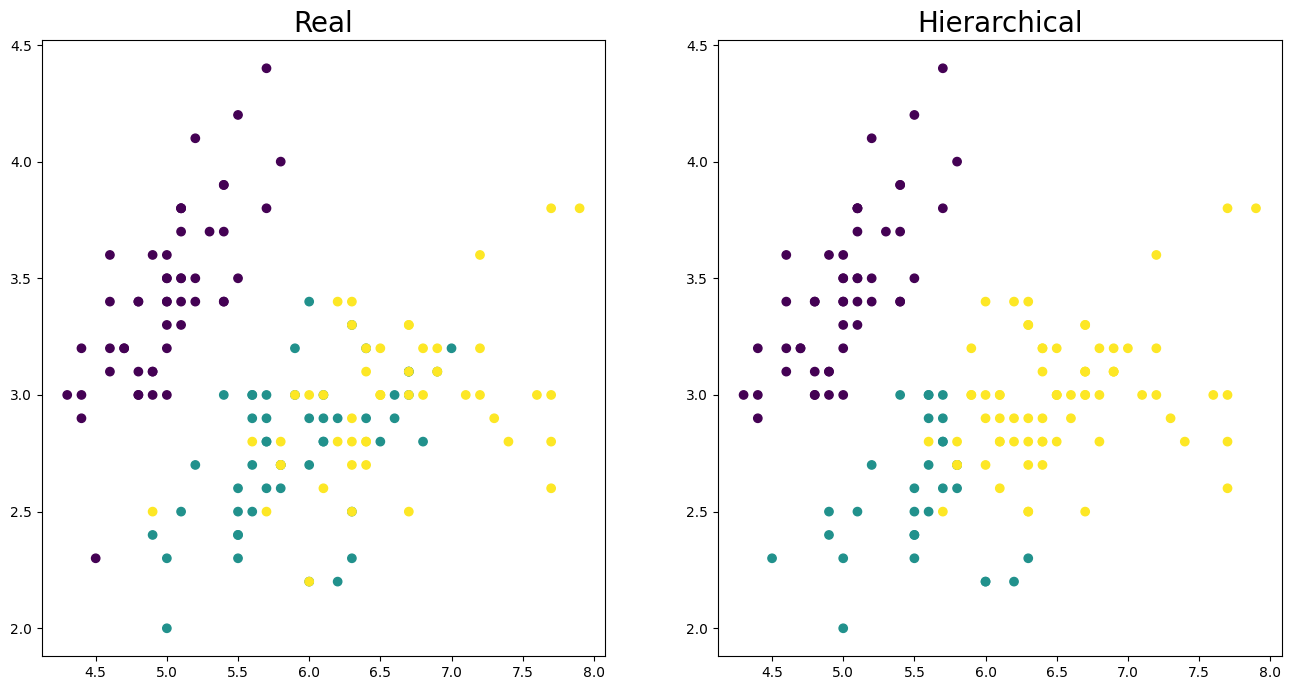

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
# c option : color sequence
axes[0].scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["label"])
axes[1].scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["cluster_label"])
axes[0].set_title("Real", fontsize=20)
axes[1].set_title("Hierarchical", fontsize=20)
plt.show()

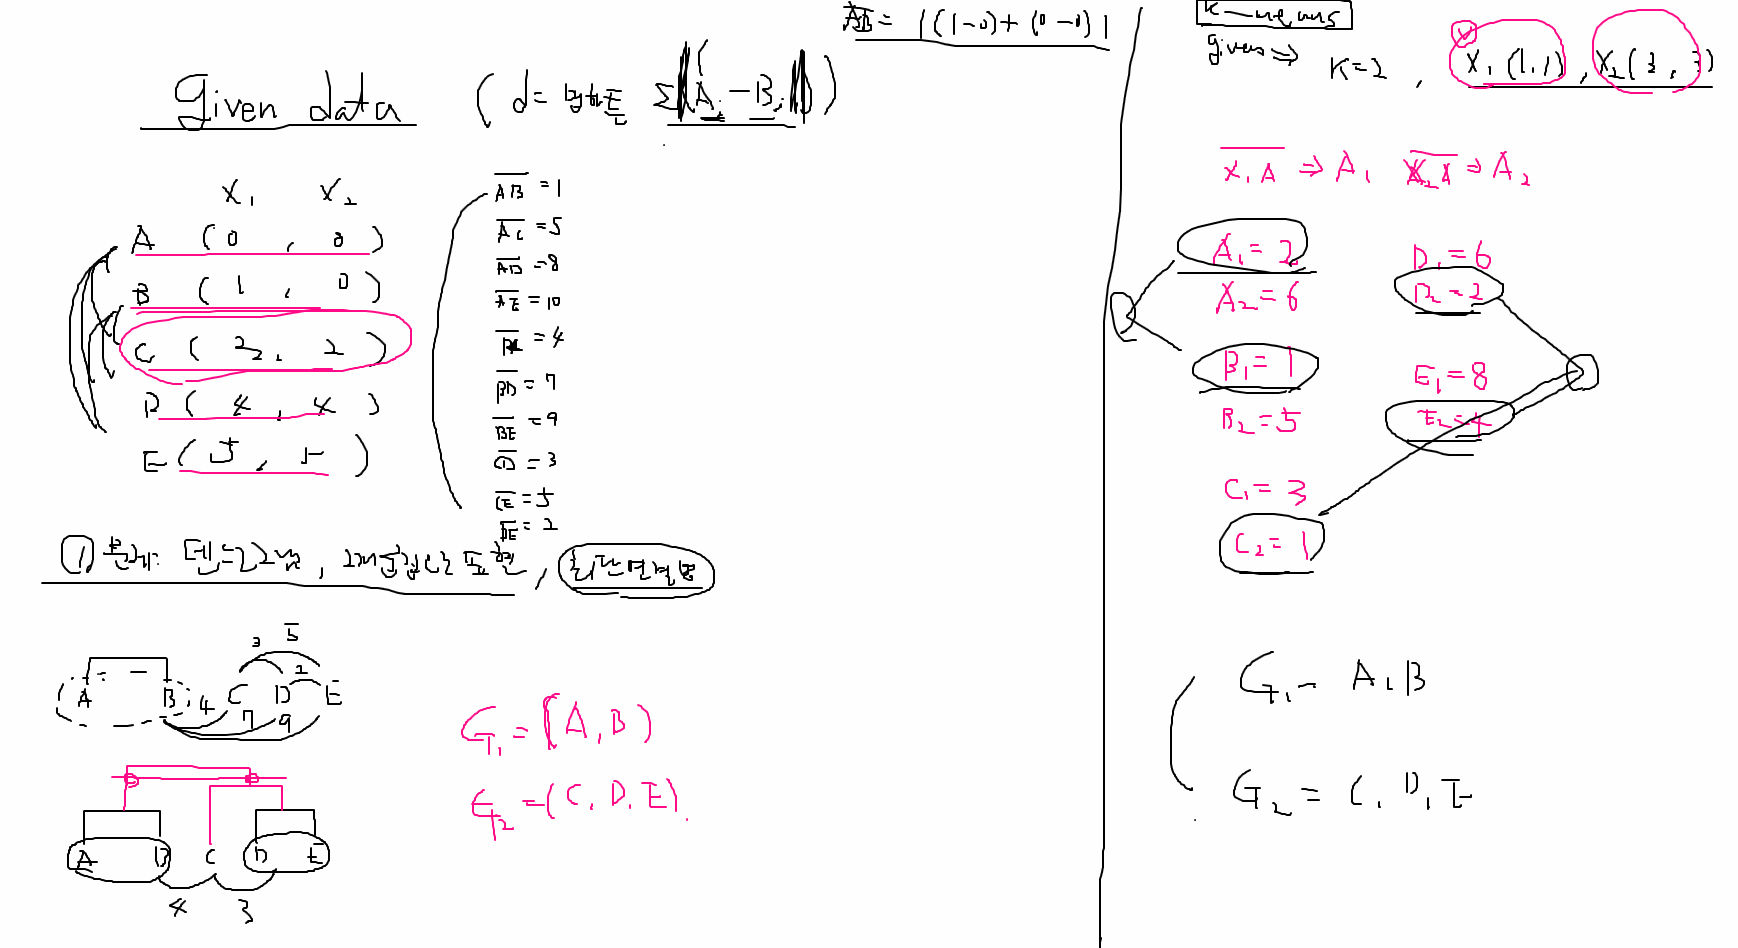

## 비계층적 군집분석(K-means)

In [14]:
from sklearn.cluster import KMeans

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label,label
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [16]:
df.drop(["cluster_label"], axis=1, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
cols = list(df.columns[:-1])
data = df.loc[:, cols]

In [18]:
model = KMeans(n_clusters=2).fit(data)

In [19]:
model.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [20]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

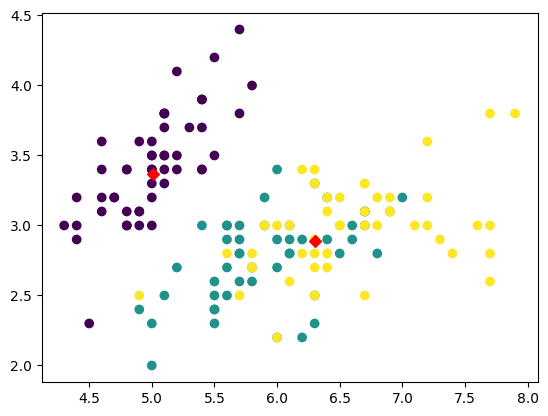

In [21]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["label"])
center_x = model.cluster_centers_[:, 0] #sepal_length centorid value
center_y = model.cluster_centers_[:, 1] #sepal_width centorid value
plt.scatter(center_x, center_y, c="red", marker="D") #marker="D" ==> diamond
plt.show()

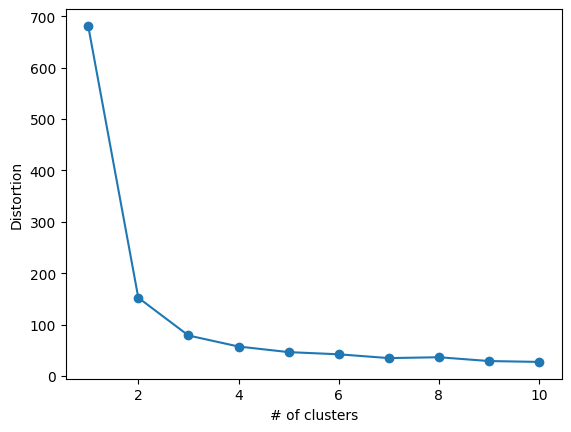

In [22]:
# optimal K ==> distortion ==> Inertia value(응집도(거리의합))
# 거리의 합 ==> 값이 작을 수록 응집도가 높다

inertias = list()

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=47)
    k_means.fit(data)
    inertias.append(k_means.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("# of clusters")
plt.ylabel("Distortion")
plt.show()

## 주성분분석(PCA)

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
#PCA 
#스케일링
#주성분분석

from sklearn.preprocessing import StandardScaler

X_train = df.iloc[:, :4]
z_scaled = StandardScaler().fit_transform(X_train)
z_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [26]:
from sklearn.decomposition import PCA
#n_compoenents ->주성분 2개를 만들어 달라
pca = PCA(n_components=2)
pca.fit(z_scaled)

PCA(n_components=2)

In [27]:
pca.components_ #주성분 PC1, PC2 ==> 고유벡터

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [28]:
#위에 고유벡터(pc1, pc2)에 데이터를 정사영 시키자.
X_pca = pca.transform(z_scaled)
X_pca.shape

(150, 2)

In [29]:
#검증 : 각 주성분이 분산을 얼마나 잘 나타냈는지를 정량화 
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [30]:
# 4개의 features --> 2개의 축으로 정사영(projection) 시켰을때 설명되는 분산
np.sum(pca.explained_variance_ratio_)

np.float64(0.9581320720000166)

In [31]:
# porjection된 데이터를 데이터프레임으로 변경한 후, 모델에 적용
pca_cols = ["pca_com_1", "pca_com_2"]
pca_df = pd.DataFrame(data = X_pca, columns=pca_cols)
pca_df["target"] = df["label"]
pca_df.head()

,pca_com_1,pca_com_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [32]:
# model test
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [33]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [34]:
X = df.iloc[:,:-1]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [35]:
dt = DecisionTreeClassifier(random_state=47).fit(x_train, y_train)

In [36]:
dt

DecisionTreeClassifier(random_state=47)

In [37]:
y_pred = dt.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.82      1.00      0.90         9
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [39]:
#비교를 위해서 pca data를 넣어보자.
X = pca_df.iloc[:,:-1]
y = pca_df["target"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
dt = DecisionTreeClassifier(random_state=47).fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.82      1.00      0.90         9
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



## Association Rule(연관분석)

In [40]:
import mlxtend #aprior, Fp-Growth 알고리즘을 사용하기 위해서

In [41]:
data = np.array([
  ['식빵', '버터', '우유'],
  ['바게트빵', '소금', '올리브유'],
  ['식빵', '버터', '우유', '잼'],
  ['치즈케익', '바게트빵', '식빵'],
  ['식빵', '잼', '샐러드유'],
  ['치즈케익', '잼', '치즈'],
  ['치즈', '우유'],
  ['식빵'],
  ['식빵', '버터', '우유'],
  ['바게트빵']
], dtype=object)

data

array([list(['식빵', '버터', '우유']), list(['바게트빵', '소금', '올리브유']),
       list(['식빵', '버터', '우유', '잼']), list(['치즈케익', '바게트빵', '식빵']),
       list(['식빵', '잼', '샐러드유']), list(['치즈케익', '잼', '치즈']),
       list(['치즈', '우유']), list(['식빵']), list(['식빵', '버터', '우유']),
       list(['바게트빵'])], dtype=object)

In [42]:
#Apriori 알고리즘
from mlxtend.preprocessing import TransactionEncoder

In [43]:
trans_enc = TransactionEncoder()
trans_arr = trans_enc.fit_transform(data)
trans_arr

array([[False,  True, False, False,  True, False,  True, False, False,
        False],
       [ True, False, False,  True, False,  True, False, False, False,
        False],
       [False,  True, False, False,  True, False,  True,  True, False,
        False],
       [ True, False, False, False,  True, False, False, False, False,
         True],
       [False, False,  True, False,  True, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False,  True, False,  True,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False,  True, False, False,  True, False,  True, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False]])

In [44]:
df = pd.DataFrame(trans_arr, columns=trans_enc.columns_)
df.head()

,바게트빵,버터,샐러드유,소금,식빵,올리브유,우유,잼,치즈,치즈케익
0,False,True,False,False,True,False,True,False,False,False
1,True,False,False,True,False,True,False,False,False,False
2,False,True,False,False,True,False,True,True,False,False
3,True,False,False,False,True,False,False,False,False,True
4,False,False,True,False,True,False,False,True,False,False


In [49]:
from mlxtend.frequent_patterns import apriori, association_rules

In [50]:
# 최소지지도 : min_support 
apriori(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.3,(바게트빵)
1,0.3,(버터)
2,0.6,(식빵)
3,0.4,(우유)
4,0.3,(잼)
5,0.3,"(버터, 식빵)"
6,0.3,"(버터, 우유)"
7,0.3,"(우유, 식빵)"
8,0.3,"(버터, 우유, 식빵)"


In [53]:
association_rules(apriori(df, min_support=0.3, use_colnames=True), num_itemsets=8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(버터),(식빵),0.3,0.6,0.3,1.0,1.666667,1.0,0.12,inf,0.571429,0.50,1.0,0.750
1,(버터),(우유),0.3,0.4,0.3,1.0,2.500000,1.0,0.18,inf,0.857143,0.75,1.0,0.875
2,"(버터, 우유)",(식빵),0.3,0.6,0.3,1.0,1.666667,1.0,0.12,inf,0.571429,0.50,1.0,0.750
3,"(버터, 식빵)",(우유),0.3,0.4,0.3,1.0,2.500000,1.0,0.18,inf,0.857143,0.75,1.0,0.875
4,"(우유, 식빵)",(버터),0.3,0.3,0.3,1.0,3.333333,1.0,0.21,inf,1.000000,1.00,1.0,1.000
5,(버터),"(우유, 식빵)",0.3,0.3,0.3,1.0,3.333333,1.0,0.21,inf,1.000000,1.00,1.0,1.000


In [54]:
# fp-growth 
# pip install mlxtend --upgrade
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.6,(식빵)
1,0.4,(우유)
2,0.3,(버터)
3,0.3,(바게트빵)
4,0.3,(잼)
5,0.3,"(우유, 식빵)"
6,0.3,"(버터, 우유)"
7,0.3,"(버터, 식빵)"
8,0.3,"(버터, 우유, 식빵)"


In [56]:
association_rules(fpgrowth(df, min_support=0.3, use_colnames=True), num_itemsets=8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(버터),(우유),0.3,0.4,0.3,1.0,2.500000,1.0,0.18,inf,0.857143,0.75,1.0,0.875
1,(버터),(식빵),0.3,0.6,0.3,1.0,1.666667,1.0,0.12,inf,0.571429,0.50,1.0,0.750
2,"(버터, 우유)",(식빵),0.3,0.6,0.3,1.0,1.666667,1.0,0.12,inf,0.571429,0.50,1.0,0.750
3,"(버터, 식빵)",(우유),0.3,0.4,0.3,1.0,2.500000,1.0,0.18,inf,0.857143,0.75,1.0,0.875
4,"(우유, 식빵)",(버터),0.3,0.3,0.3,1.0,3.333333,1.0,0.21,inf,1.000000,1.00,1.0,1.000
5,(버터),"(우유, 식빵)",0.3,0.3,0.3,1.0,3.333333,1.0,0.21,inf,1.000000,1.00,1.0,1.000
